In [7]:
import torch

import pandas as pd
import os 
import sys 
sys.path.append("../../")
import torch.optim as optim

from src.utils.model_utils import plot_history, confusion, precision, recall, F1
from src.models.medical_codes_rnn import McRnn


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load model

In [2]:
path = 'results/exp_2019-09-05_15:16:29_max_len-10_task-0.5_pred_layer-max_pooling.pt'
checkpoint = torch.load(path)
model_args =  checkpoint['model_args']
model = McRnn(**model_args)
optimizer = optimizer = optim.SGD(model.parameters(), lr=0.1)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
evaluation = checkpoint['evaluation']
epoch = checkpoint['epoch']
train_loss_history = checkpoint['train_loss_history']
dev_loss_history = checkpoint['dev_loss_history']

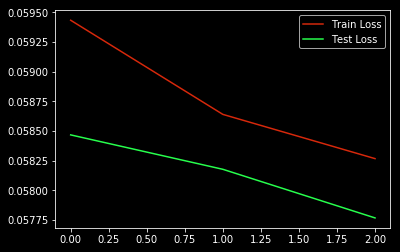

In [3]:
plot_history(train_loss_history, dev_loss_history)

# Inspect and evaluate model

In [12]:
#### roc curve
## read test patient ids
test_ids =  pd.read_csv(os.path.join('data/preprocessed10K/patient_test_ids.csv'))['patient_id'].values
# read all sequences
sequences = pd.read_csv('data/preprocessed10K/patients_ix_sequences_with_condition.csv', index_col = "patientID")
# evaluate the scores for the test ids
y_gold, y_scores, outcome_golds, outcome_preds = model.evaluate(sequences, test_ids)

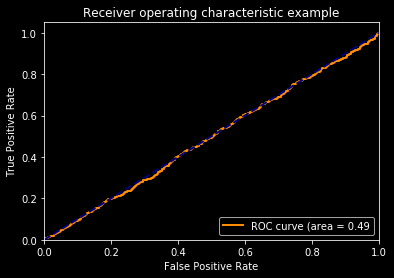

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
targeted_class_index = 1 
# feed roc curve with golds and target score (outputs of the model are logproba)
fpr, tpr, thresholds = roc_curve(condition_golds, torch.exp(condition_preds[:, targeted_class_index]))
roc_auc = auc(fpr, tpr)
# ploting the roc-curve
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
